# Project 2: More Data, More Visualizations

Karamoja is the most food-insecure region of Uganda. One of the main reasons is the low productivity level of the crops due to intense droughts as well as pest and disease outbreaks. Karamoja (Links to an external site.)Links to an external site.

In Karamoja, several NGOs provide technical support as well as farm inputs to the farmers experiencing extremely low yield. Though, they lack visibility into the overall state of the region and often need to rely on some very local sources of information to prioritize their activities.
Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.

To do so, Dalberg Data Insights developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images. The agri-tech team just ran the model for the 2017 crop season.

## Research Question
As a **_Data Analyst_** , the agri-tech team is asking you to develop an interactive visualization tool of the results for this first crop season. This visualization tool that you will develop will be used as a first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.

Based on your experience, the team expects you to come up with a first draft within the coming 3 working days. They give you carte blanche in terms of structure and functionalities but they know that the client wants:
At least a map in the dashboard
The possibility of visualizing the results by district or sub-county (two administrative levels used by the NGO)

## **Dataset Files**
Dataset Source [Link]Links to an external site.
- Shapefiles
- Boundaries of Uganda Subcounties
- Boundaries of Uganda Districts
- Crop Type Map for Sorghum (i.e. position of the Sorghum fields)
- Crop Type Map for Maize
- Tables
- Yield and Population per Subcounty
- POP: total population for the subcounty
- S_Yield_Ha: average yield for sorghum for the subcounty (Kg/Ha)
- M_Yield_Ha: average yield for maize for the subcounty (Kg/Ha)
- Crop_Area_Ha: total crop area for the subcounty (Ha)
- S_Area_Ha: total sorghum crop area for the subcounty (Ha)
- M_Area_Ha: total maize crop area for the subcounty (Ha)
- S_Prod_Tot: total productivity for the sorghum for the subcounty (Kg)
- M_Prod_Tot: total productivity for the maize for the subcounty (Kg)
- Yield and Population per District

In [1]:
!pip install --upgrade --no-cache-dir fiona


Requirement already up-to-date: fiona in c:\users\hp\anaconda3\envs\learn-env\lib\site-packages (1.10.1)


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
district_data = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_data


,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [4]:
subcounty_data = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
subcounty_data

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05


In [5]:
district_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [6]:
subcounty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [7]:
district_data.head(5)

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [8]:
subcounty_data.head(5)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


## Data cleaning

In [9]:
#checking for missing data in subcounty_data
subcounty_data.isnull().sum()

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

In [10]:
#checking for missing data in district_data
district_data.isnull().sum()

OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64

In [11]:
subcounty_data.duplicated().sum()

0

In [12]:
district_data.duplicated().sum()

0

In [29]:
subcounty_data.dtypes

OBJECTID            int64
SUBCOUNTY_NAME     object
DISTRICT_NAME      object
POP                 int64
Area                int64
Karamoja           object
S_Yield_Ha        float64
M_Yield_Ha        float64
Crop_Area_Ha      float64
S_Area_Ha         float64
M_Area_Ha         float64
S_Prod_Tot        float64
M_Prod_Tot        float64
dtype: object

## EDA 

In [13]:
subcounty_data.describe()


,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [14]:
district_data.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


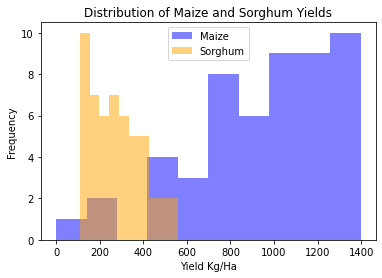

In [27]:
# Crop Yield Distribution 
plt.figure()
plt.hist(subcounty_data['M_Yield_Ha'], bins=10, alpha=0.5, label='Maize', color='blue')
plt.hist(subcounty_data['S_Yield_Ha'], bins=10, alpha=0.5, label='Sorghum', color='orange')
plt.xlabel('Yield Kg/Ha')
plt.ylabel('Frequency')
plt.title('Distribution of Maize and Sorghum Yields')
plt.legend()
plt.show()

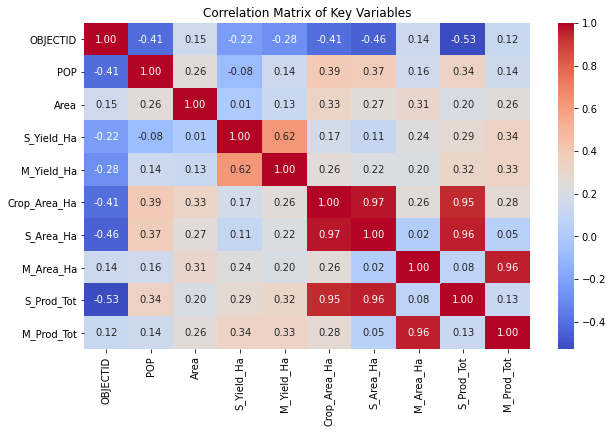

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(subcounty_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

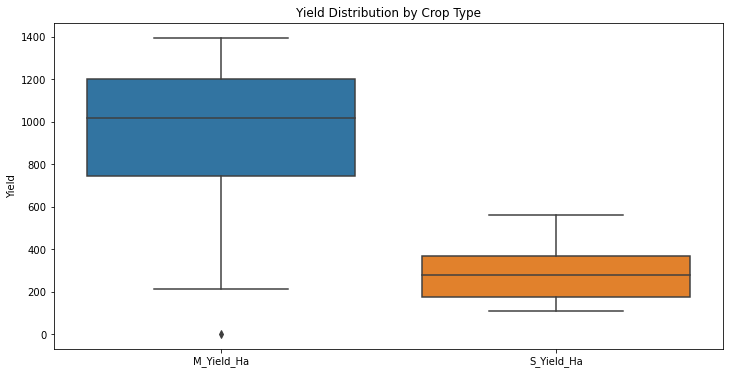

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=subcounty_data[['M_Yield_Ha', 'S_Yield_Ha']])
plt.title('Yield Distribution by Crop Type')
plt.ylabel('Yield')
plt.show()

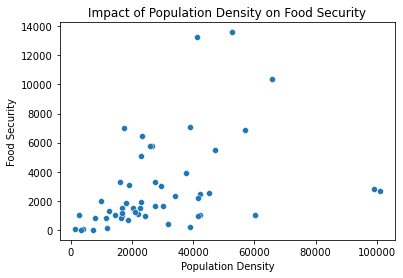

In [32]:
plt.figure()
sns.scatterplot(x=subcounty_data['POP'], y=subcounty_data['Crop_Area_Ha'])
plt.xlabel('Population Density')
plt.ylabel('Food Security')
plt.title('Impact of Population Density on Food Security')
plt.show()

In [28]:
subcounty_data.to_csv('Clean_subcounty_data.csv', index=False)


In [33]:
district_data.to_csv('clean_district_data.csv' , index=False)

This is the link to my power point presentation https://1drv.ms/p/c/2004b6966d7f6cc0/EaH2w8a3zEJJhhYPPXWMBSMBtTY7ZSUC2Bg_-J6HYuoOjQ?e=lOyNH3

This is the link to my Tableau https://public.tableau.com/views/KARAMOJAREGION-UGANDA/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link